# Montu Python 
## Astronomical ephemerides for the Ancient World
## Test: Sun

In [126]:
import montu
from montu import D2H,PRINTDF,TABLEDF,DEG,RAD
montu.Util.load_kernels()

# Load legacy code to compare
import montu.__cycle_3 as montu2
montu2.Util.load_kernels()

import pandas as pd
import ephem as pyephem

# Autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Testing

Creation of object:

In [3]:
sun = montu.Sun()
sun.__dict__

{'position': [],
 'condition': [],
 'seba': <Sun "Sun" at 0x7fe1a6dcb680>,
 'name': 'Sun'}

In [4]:
sun

Object Sun positions:
'
Object Sun conditions:
'

Basic ephemerides calculation:

In [5]:
tebas = montu.Observer(lon=33,lat=24,height=0)
mtime = montu.Time('-2500-01-01 12:00:00')
sun = montu.Sun()
sun.where_in_sky(at=mtime,observer=tebas,store=0)
sun

Object Sun positions:
|            tt |    jed | Name   |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |      el |      az |
|---------------|--------|--------|-----------|------------|-----------|------------|---------|----------|---------|---------|
| -142006202700 | 807954 | Sun    |   23.0796 |   -6.14598 |   18.9186 |    -23.366 | 18.9187 | -23.3643 | 34.7618 | 213.171 |'
Object Sun conditions:
'

In [6]:
sun.position

{'tt': -142006202700, 'jed': 807954.0, 'Name': 'Sun', 'RAJ2000': 23.079589808520172, 'DecJ2000': -6.1459764235647425, 'RAEpoch': 18.918606877481025, 'DecEpoch': -23.366025821041386, 'RAGeo': 18.918686672714518, 'DecGeo': -23.364339327508276, 'el': 34.76177991282175, 'az': 213.17107826031173}

Performance:

In [41]:
print("No storage")
%timeit sun.where_in_sky(at=mtime,observer=tebas)
print("Storage")
sun.reset_store()
%timeit sun.where_in_sky(at=mtime,observer=tebas,store=True)

No storage
8.27 µs ± 550 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Storage
The slowest run took 4.31 times longer than the fastest. This could mean that an intermediate result is being cached.
9.29 µs ± 6.99 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
sun.conditions_in_sky(at=mtime,observer=tebas)
sun

Object Sun positions:
|            tt |    jed | Name   |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |      el |      az |
|---------------|--------|--------|-----------|------------|-----------|------------|---------|----------|---------|---------|
| -142006202700 | 807954 | Sun    |   23.0796 |   -6.14598 |   18.9186 |    -23.366 | 18.9187 | -23.3643 | 34.7618 | 213.171 |'
Object Sun conditions:
|      ha |   Vmag |   rise_time |   rise_az |   set_time |   set_az |   transit_time |   transit_el |   elongation |   earth_distance |   sun_distance | is_circumpolar   | is_neverup   |   angsize |   phase |         hlat |    hlon |   hlong |
|---------|--------|-------------|-----------|------------|----------|----------------|--------------|--------------|------------------|----------------|------------------|--------------|-----------|---------|--------------|---------|---------|
| 1.95509 |  -26.8 |      807954 |   115.486 |     807954 |  244.561 |         8079

In [10]:
(montu.Time.get_date(sun.condition.rise_time),
montu.Time.get_date(sun.condition.transit_time),
montu.Time.get_date(sun.condition.set_time))

((-2501, 1, 22, 4, 44, 17.676679),
 (-2501, 1, 22, 10, 2, 40.134603),
 (-2501, 1, 22, 15, 21, 7.979644))

Performance:

In [46]:
print("No storage")
%timeit sun.conditions_in_sky(at=mtime,observer=tebas)
print("Storage")
sun.reset_store()
%timeit sun.conditions_in_sky(at=mtime,observer=tebas,store=True)

No storage
307 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Storage
264 µs ± 4.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Storing

In [57]:
tebas = montu.Observer(lon=33,lat=24,height=0)
mtime = montu.Time('-2500-01-01 12:00:00')
sun = montu.Sun()
sun.reset_store()
for dt in montu.Util.arange(0,24*montu.HOUR,1*montu.HOUR):
    sun.where_in_sky(at=mtime + dt,observer=tebas,store=True)

In [59]:
sun

Object Sun positions:
|            tt |    jed | Name   |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |        el |       az |
|---------------|--------|--------|-----------|------------|-----------|------------|---------|----------|-----------|----------|
| -142006202700 | 807954 | Sun    |   23.0796 |   -6.14598 |   18.9186 |   -23.366  | 18.9187 | -23.3643 |  34.7618  | 213.171  |
| -142006199100 | 807954 | Sun    |   23.0821 |   -6.12959 |   18.9216 |   -23.3619 | 18.9217 | -23.3603 |  26.0532  | 225.543  |
| -142006195500 | 807954 | Sun    |   23.0847 |   -6.11321 |   18.9245 |   -23.3577 | 18.9247 | -23.3563 |  15.5238  | 235.006  |
| -142006191900 | 807954 | Sun    |   23.0872 |   -6.09682 |   18.9275 |   -23.3534 | 18.9277 | -23.3523 |   3.94888 | 242.35   |
| -142006188300 | 807954 | Sun    |   23.0898 |   -6.08042 |   18.9305 |   -23.3491 | 18.9307 | -23.3482 |  -8.69273 | 248.234  |
| -142006184700 | 807954 | Sun    |   23.0923 |   -6.06403 |   18.93

Timing:

One line:

In [65]:
sun.reset_store()
ephemerides = lambda store:[sun.where_in_sky(at=mtime + dt,observer=tebas,store=store) \
                            for dt in montu.Util.arange(0,24*montu.HOUR,1*montu.HOUR)]
ephemerides(1)
sun

Object Sun positions:
|            tt |    jed | Name   |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |        el |       az |
|---------------|--------|--------|-----------|------------|-----------|------------|---------|----------|-----------|----------|
| -142006202700 | 807954 | Sun    |   23.0796 |   -6.14598 |   18.9186 |   -23.366  | 18.9187 | -23.3643 |  34.7618  | 213.171  |
| -142006199100 | 807954 | Sun    |   23.0821 |   -6.12959 |   18.9216 |   -23.3619 | 18.9217 | -23.3603 |  26.0532  | 225.543  |
| -142006195500 | 807954 | Sun    |   23.0847 |   -6.11321 |   18.9245 |   -23.3577 | 18.9247 | -23.3563 |  15.5238  | 235.006  |
| -142006191900 | 807954 | Sun    |   23.0872 |   -6.09682 |   18.9275 |   -23.3534 | 18.9277 | -23.3523 |   3.94888 | 242.35   |
| -142006188300 | 807954 | Sun    |   23.0898 |   -6.08042 |   18.9305 |   -23.3491 | 18.9307 | -23.3482 |  -8.69273 | 248.234  |
| -142006184700 | 807954 | Sun    |   23.0923 |   -6.06403 |   18.93

Time it:

In [70]:
print("Storage:")
sun.reset_store()
%timeit ephemerides(1)
print("No storage:")
%timeit ephemerides(0)

Storage:
3.47 ms ± 429 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
No storage:
3.16 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Test moon:

In [20]:
tebas = montu.Observer(lon=33,lat=24,height=0)
mtime = montu.Time('-2500-01-01 12:00:00')
moon = montu.Moon()
moon.where_in_sky(at=mtime,observer=tebas)
moon

Object Moon positions:
|            tt |    jed | Name   |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |      el |      az |
|---------------|--------|--------|-----------|------------|-----------|------------|---------|----------|---------|---------|
| -142006202700 | 807954 | Moon   |    13.119 |   -1.75958 |   9.19541 |    21.2138 | 9.20076 |  21.8977 | -44.543 | 353.683 |'
Object Moon conditions:
'

In [26]:
tebas = montu.Observer(lon=33,lat=24,height=0)
mtime = montu.Time('-2500-01-01 12:00:00')
moon = montu.Moon()
moon.conditions_in_sky(at=mtime,observer=tebas)
moon

Object Moon positions:
|            tt |    jed | Name   |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |      el |      az |
|---------------|--------|--------|-----------|------------|-----------|------------|---------|----------|---------|---------|
| -142006202700 | 807954 | Moon   |    13.119 |   -1.75958 |   9.19541 |    21.2138 | 9.20076 |  21.8977 | -44.543 | 353.683 |'
Object Moon conditions:
|      ha |   Vmag |   rise_time |   rise_az |   set_time |   set_az |   transit_time |   transit_el |   elongation |   earth_distance |   sun_distance | is_circumpolar   | is_neverup   |   angsize |   phase |   hlat |    hlon |   hlong |
|---------|--------|-------------|-----------|------------|----------|----------------|--------------|--------------|------------------|----------------|------------------|--------------|-----------|---------|--------|---------|---------|
| 11.6783 |  -12.6 |      807954 |   67.2764 |     807954 |  294.859 |    2.41502e+06 |      

In [28]:
(montu.Time.get_date(moon.condition.rise_time),
montu.Time.get_date(moon.condition.transit_time),
montu.Time.get_date(moon.condition.set_time))

((-2501, 1, 22, 17, 55, 21.744619),
 (1899, 12, 31, 12, 0, 0.0),
 (-2501, 1, 22, 6, 49, 23.433051))

### Test planet

In [14]:
tebas = montu.Observer(lon=33,lat=24,height=0)
mtime = montu.Time('-2500-01-01 12:00:00')
planet = montu.Planet('Mars')
planet.where_in_sky(at=mtime,observer=tebas)
planet

Object Mars positions:
|            tt |    jed | Name   |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |       el |      az |
|---------------|--------|--------|-----------|------------|-----------|------------|---------|----------|----------|---------|
| -142006202700 | 807954 | Mars   |    12.531 |    1.62045 |   8.53603 |    24.1114 | 8.53601 |  24.1141 | -41.6385 | 6.18997 |'
Object Mars conditions:
'

In [18]:
tebas = montu.Observer(lon=33,lat=24,height=0)
mtime = montu.Time('-2500-01-01 12:00:00')
planet = montu.Planet('Jupiter')
planet.conditions_in_sky(at=mtime,observer=tebas)
planet

Object Jupiter positions:
|            tt |    jed | Name    |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |       el |      az |
|---------------|--------|---------|-----------|------------|-----------|------------|---------|----------|----------|---------|
| -142006202700 | 807954 | Jupiter |   18.1377 |   -23.1487 |   13.8518 |   -10.7623 | 13.8518 | -10.7621 | -18.2529 | 266.078 |'
Object Jupiter conditions:
|      ha |   Vmag |   rise_time |   rise_az |   set_time |   set_az |   transit_time |   transit_el |   elongation |   earth_distance |   sun_distance | is_circumpolar   | is_neverup   |   angsize |   phase |     hlat |   hlon |   hlong |
|---------|--------|-------------|-----------|------------|----------|----------------|--------------|--------------|------------------|----------------|------------------|--------------|-----------|---------|----------|--------|---------|
| 7.02194 |  -1.91 |      807954 |   101.565 |     807954 |  258.462 |         

In [19]:
(montu.Time.get_date(planet.condition.rise_time),
montu.Time.get_date(planet.condition.transit_time),
montu.Time.get_date(planet.condition.set_time))

((-2501, 1, 22, 23, 14, 1.88575),
 (-2501, 1, 22, 4, 59, 41.510674),
 (-2501, 1, 22, 10, 41, 57.776492))

### Useful code

#### Basic planetary fields

Extract fields from astronomical object of `PyEphem`:

In [20]:
montu_to_pyephem = {
            'Name':'name',
            # Position in sky
            'RAJ2000':'a_ra',
            'DecJ2000':'a_dec',
            'RAEpoch':'ra',
            'DecEpoch':'dec',
            'RAGeo':'g_ra',
            'DecGeo':'g_dec',
            # Position in horizon
            'el':'alt',
            'az':'az',
            'ha':'ha',
            # Rise, transit and set
            'rise_time':'rise_time',
            'rise_az':'rise_az',
            'set_time':'set_time',
            'set_az':'set_az',
            'transit_time':'transit_time',
            'transit_el':'transit_alt',
            'elongation':'elong',
            # Physical position
            'earth_distance':'earth_distance',
            'sun_distance':'sun_distance',
            'is_circumpolar':'circumpolar',
            'is_neverup':'neverup',
            'angsize':'size',
            'phase':'phase',
            'Vmag':'mag',
            # Viewing conditions
            'hlat':'hlat',
            'hlon':'hlon',
            'hlong':'hlong',
}
pyephem_to_montu = {}
for key,item in montu_to_pyephem.items():
    pyephem_to_montu[item] = key

In [21]:
import re
sun = montu.Sun()
tebas = montu.Observer(lon=33,lat=24,height=0)
tebas.site.date = 0
sun.seba.compute(tebas.site)

# Get fields
fields = []
dir_ephem = dir(sun.seba)
for field in pyephem_to_montu.keys():
    if field in dir_ephem:
        fields += [field]
        dir_ephem.pop(dir_ephem.index(field))
fields = fields + dir_ephem

i = 1
field_list = ""
for field in fields:
    is_added = False

    if '__' in field:
        continue

    field_type = str(eval(f"type(sun.seba.{field})"))

    if 'function' in field_type:
        continue

    if field in pyephem_to_montu.keys():
        montu_field = pyephem_to_montu[field]
    else:
        montu_field = field
    if 'Angle' in field_type:
        if re.match('.*ra$',field) or re.match('ha$',field):
            factor = 'montu.RAD/15'
        else:
            factor = 'montu.RAD'
        field_list += f"'{montu_field}':[self.seba.{field}*{factor}],"
        is_added = True
    else:
        field_list += f"'{montu_field}':[self.seba.{field}],"
        is_added = True
    if is_added:
        if (i%2)==0:
            field_list += "\n"
        i+=1
    #print(field,field_type)
print(field_list)

'Name':[self.seba.name],'RAJ2000':[self.seba.a_ra*montu.RAD/15],
'DecJ2000':[self.seba.a_dec*montu.RAD],'RAEpoch':[self.seba.ra*montu.RAD/15],
'DecEpoch':[self.seba.dec*montu.RAD],'RAGeo':[self.seba.g_ra*montu.RAD/15],
'DecGeo':[self.seba.g_dec*montu.RAD],'el':[self.seba.alt*montu.RAD],
'az':[self.seba.az*montu.RAD],'ha':[self.seba.ha*montu.RAD/15],
'rise_time':[self.seba.rise_time],'rise_az':[self.seba.rise_az*montu.RAD],
'set_time':[self.seba.set_time],'set_az':[self.seba.set_az*montu.RAD],
'transit_time':[self.seba.transit_time],'transit_el':[self.seba.transit_alt*montu.RAD],
'elongation':[self.seba.elong*montu.RAD],'earth_distance':[self.seba.earth_distance],
'sun_distance':[self.seba.sun_distance],'is_circumpolar':[self.seba.circumpolar],
'is_neverup':[self.seba.neverup],'angsize':[self.seba.size],
'phase':[self.seba.phase],'Vmag':[self.seba.mag],
'hlat':[self.seba.hlat*montu.RAD],'hlon':[self.seba.hlon*montu.RAD],
'hlong':[self.seba.hlong*montu.RAD],'a_epoch':[self.seba.a_epoch],

#### Moon fields

In [22]:
import re
moon = montu.Moon()
tebas = montu.Observer(lon=33,lat=24,height=0)
tebas.site.date = 0
moon.seba.compute(tebas.site)
dir(moon.seba)

['__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'a_dec',
 'a_epoch',
 'a_ra',
 'alt',
 'az',
 'circumpolar',
 'colong',
 'compute',
 'copy',
 'dec',
 'earth_distance',
 'elong',
 'g_dec',
 'g_ra',
 'ha',
 'hlat',
 'hlon',
 'hlong',
 'libration_lat',
 'libration_long',
 'mag',
 'moon_phase',
 'name',
 'neverup',
 'parallactic_angle',
 'phase',
 'ra',
 'radius',
 'rise_az',
 'rise_time',
 'set_az',
 'set_time',
 'size',
 'subsolar_lat',
 'sun_distance',
 'transit_alt',
 'transit_time',
 'writedb']

In [23]:
import re
moon = montu.Moon()
tebas = montu.Observer(lon=33,lat=24,height=0)
tebas.site.date = 0
moon.seba.compute(tebas.site)

# Get fields
fields = []
dir_ephem = dir(moon.seba)
for field in pyephem_to_montu.keys():
    if field in dir_ephem:
        fields += [field]
        dir_ephem.pop(dir_ephem.index(field))
fields = fields + dir_ephem

i = 1
field_list = ""
for field in fields:
    is_added = False

    if '__' in field:
        continue

    field_type = str(eval(f"type(moon.seba.{field})"))

    if 'function' in field_type:
        continue

    if field in pyephem_to_montu.keys():
        montu_field = pyephem_to_montu[field]
    else:
        montu_field = field
    if 'Angle' in field_type:
        if re.match('.*ra$',field) or re.match('ha$',field):
            factor = 'montu.RAD/15'
        else:
            factor = 'montu.RAD'
        field_list += f"'{montu_field}':[self.seba.{field}*{factor}],"
        is_added = True
    else:
        field_list += f"'{montu_field}':[self.seba.{field}],"
        is_added = True
    if is_added:
        if (i%2)==0:
            field_list += "\n"
        i+=1
    #print(field,field_type)
print(field_list)

'Name':[self.seba.name],'RAJ2000':[self.seba.a_ra*montu.RAD/15],
'DecJ2000':[self.seba.a_dec*montu.RAD],'RAEpoch':[self.seba.ra*montu.RAD/15],
'DecEpoch':[self.seba.dec*montu.RAD],'RAGeo':[self.seba.g_ra*montu.RAD/15],
'DecGeo':[self.seba.g_dec*montu.RAD],'el':[self.seba.alt*montu.RAD],
'az':[self.seba.az*montu.RAD],'ha':[self.seba.ha*montu.RAD/15],
'rise_time':[self.seba.rise_time],'rise_az':[self.seba.rise_az*montu.RAD],
'set_time':[self.seba.set_time],'set_az':[self.seba.set_az*montu.RAD],
'transit_time':[self.seba.transit_time],'transit_el':[self.seba.transit_alt*montu.RAD],
'elongation':[self.seba.elong*montu.RAD],'earth_distance':[self.seba.earth_distance],
'sun_distance':[self.seba.sun_distance],'is_circumpolar':[self.seba.circumpolar],
'is_neverup':[self.seba.neverup],'angsize':[self.seba.size],
'phase':[self.seba.phase],'Vmag':[self.seba.mag],
'hlat':[self.seba.hlat*montu.RAD],'hlon':[self.seba.hlon*montu.RAD],
'hlong':[self.seba.hlong*montu.RAD],'a_epoch':[self.seba.a_epoch],

#### Satellite

In [19]:
import re
satellite = montu.Planet('Ganymede')
tebas = montu.Observer(lon=33,lat=24,height=0)
tebas.site.date = 0
satellite.seba.compute(tebas.site)
dir(satellite.seba)

['__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__planet__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a_dec',
 'a_ra',
 'alt',
 'az',
 'compute',
 'copy',
 'dec',
 'earth_visible',
 'g_dec',
 'g_ra',
 'name',
 'parallactic_angle',
 'ra',
 'sun_visible',
 'writedb',
 'x',
 'y',
 'z']

## Twilight time

In [1]:
import montu
from montu import D2H,PRINTDF,TABLEDF,DEG,RAD
montu.Util.load_kernels()

# Load legacy code to compare
import montu.__cycle_3 as montu2
montu2.Util.load_kernels()

import pandas as pd
import ephem as pyephem
import numpy as np
import matplotlib.pyplot as plt

# Autoreload
%load_ext autoreload
%autoreload 2

Running MontuPython version 0.9.1


In [7]:
tebas = montu.Observer(lon=33,lat=24,height=0)
mtime = montu.Time('-2500-01-01 12:00:00')
print(mtime)
sun = montu.Sun()
sun.conditions_in_sky(at=mtime,observer=tebas,store=0)
sun

Montu Time Object:
-------------------------- 
Readable:
    Date in proleptic UTC: -2500-01-01 12:00:00.0000
    Date in mixed UTC: -2500-01-22 12:00:00
    Date in SPICE format: 2501 B.C. 01-01 12:00:00.00
    Components: [-1, 2500, 1, 1, 12, 0, 0, 0]
Objects:
    Date in datetime64 format: -2500-01-01T12:00:00.000000
    Date in PyPlanet Epoch: 807954.0
    Date in PyEphem Epoch: -2501/1/22 12:00:00
General:
    Is bce: True
    Is Julian: True
Uniform scales:
    Terrestrial time:
        tt: -142006202700.3
        jtd: 807954.6909688
    UTC time:
        et: -142006262400.0
        jed: 807954.0
    Delta-t = TT - UTC = 59699.7



Object Sun positions:
|            tt |    jed | Name   |   RAJ2000 |   DecJ2000 |   RAEpoch |   DecEpoch |   RAGeo |   DecGeo |      el |      az |
|---------------|--------|--------|-----------|------------|-----------|------------|---------|----------|---------|---------|
| -142006202700 | 807954 | Sun    |   23.0796 |   -6.14598 |   18.9186 |    -23.366 | 18.9187 | -23.3643 | 34.7618 | 213.171 |'
Object Sun conditions:
|      ha |   Vmag |   rise_time |   rise_az |   set_time |   set_az |   transit_time |   transit_el |   elongation |   earth_distance |   sun_distance | is_circumpolar   | is_neverup   |   angsize |   phase |         hlat |    hlon |   hlong |
|---------|--------|-------------|-----------|------------|----------|----------------|--------------|--------------|------------------|----------------|------------------|--------------|-----------|---------|--------------|---------|---------|
| 1.95509 |  -26.8 |      807954 |   115.486 |     807954 |  244.561 |         8079

In [118]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d

def when_is_twilight(day=None, observer=None, sunbelow=-6):
    """Time of start and end of night time (between twilights).

    Parameters:
        at: montu.Time, default = None:
            Time at which the twilight is calculated.

        observer: montu.Observer, default = None:
            Observer which see the object.

        sunbelow: float [deg], default = -6:
            Angle below the horizon on which the astronomical
            twilight is defined.
            For convention: 
                sunbelow = -6 for civil twilight
                sunbelow = -12 for nautical twilight
                sunbelow = -18 for astronomical twilight

    Return:
        dusk_time, down_time: float [julian day]:
            Time of start and end of night: time of astronomical dusk
            time of astronomical down.

        appearance_function: function(Vmag):
            It gives you a function to compute the time when the 
            object starts to be observed and when it dissapears.
            This time depends on the angle below the horizon from which 
            we define the object will be visible under clear sky conditions.

    References:
        https://en.wikipedia.org/wiki/Twilight
    """
    # Get rise and set time for Sun
    sun = montu.Sun()
    sun.conditions_in_sky(at=day,observer=observer)
    set_time = sun.condition.set_time
    rise_time = sun.condition.rise_time
    
    # Routine for calculating twilight
    def is_sun_elevation_at(dt,ref_time,elevation):
        time = ref_time + dt/montu.DAY
        sun._compute_ephemerides(time,observer=observer)
        sun_elevation = sun.seba.alt*montu.RAD
        return sun_elevation - elevation

    # Calculate dusk and dawn time
    xtol = 1 # Tolerance set to 1 second to reduce computing time 
    dusk_time = rise_time + brentq(is_sun_elevation_at,-6*montu.HOUR,0,args=(rise_time,sunbelow),xtol=xtol)/montu.DAY
    dawn_time = set_time + brentq(is_sun_elevation_at,0,+6*montu.HOUR,args=(set_time,sunbelow),xtol=xtol)/montu.DAY

    return dusk_time,dawn_time

In [123]:
tebas = montu.Observer(lon=33,lat=24,height=0)
mtime = montu.Time('-2500-01-01')
dusk_time,dawn_time = montu.Sun.when_is_twilight(day=mtime,observer=tebas,sunbelow=-18)
tebas.get_local_time(dusk_time),tebas.get_local_time(dawn_time)

('05:34:2.892', '18:55:22.138')

In [124]:
%timeit dusk_time,dawn_time = montu.Sun.when_is_twilight(day=mtime,observer=tebas,sunbelow=-6)

1.42 ms ± 273 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [128]:
allstars = montu.Stars()

In [132]:
allstars.data.sort_values(by='Distance').iloc[:101].to_csv('montmp/100-closest-stars.csv')

In [134]:
len(allstars.data)

119626

In [135]:
allstars.data.to_excel('montmp/montu_stellar_catalogue_v37-english.xlsx')

In [150]:
allstars.data = allstars.data.iloc[:1000]

In [153]:
from matplotlib import cm

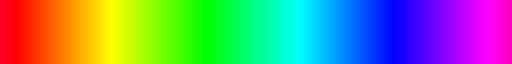

In [159]:
rainbow = cm.get_cmap('gist_rainbow')
rainbow

In [158]:
rainbow(0)

(1.0, 0.0, 0.16, 1.0)

In [163]:
allstars.data['B-V'].min()

-0.269

In [164]:
ind2color=montu.Util._linear_map([-0.2,2.5],[1,0])


In [ ]:
rainbow(

In [167]:
allstars = montu.Stars()

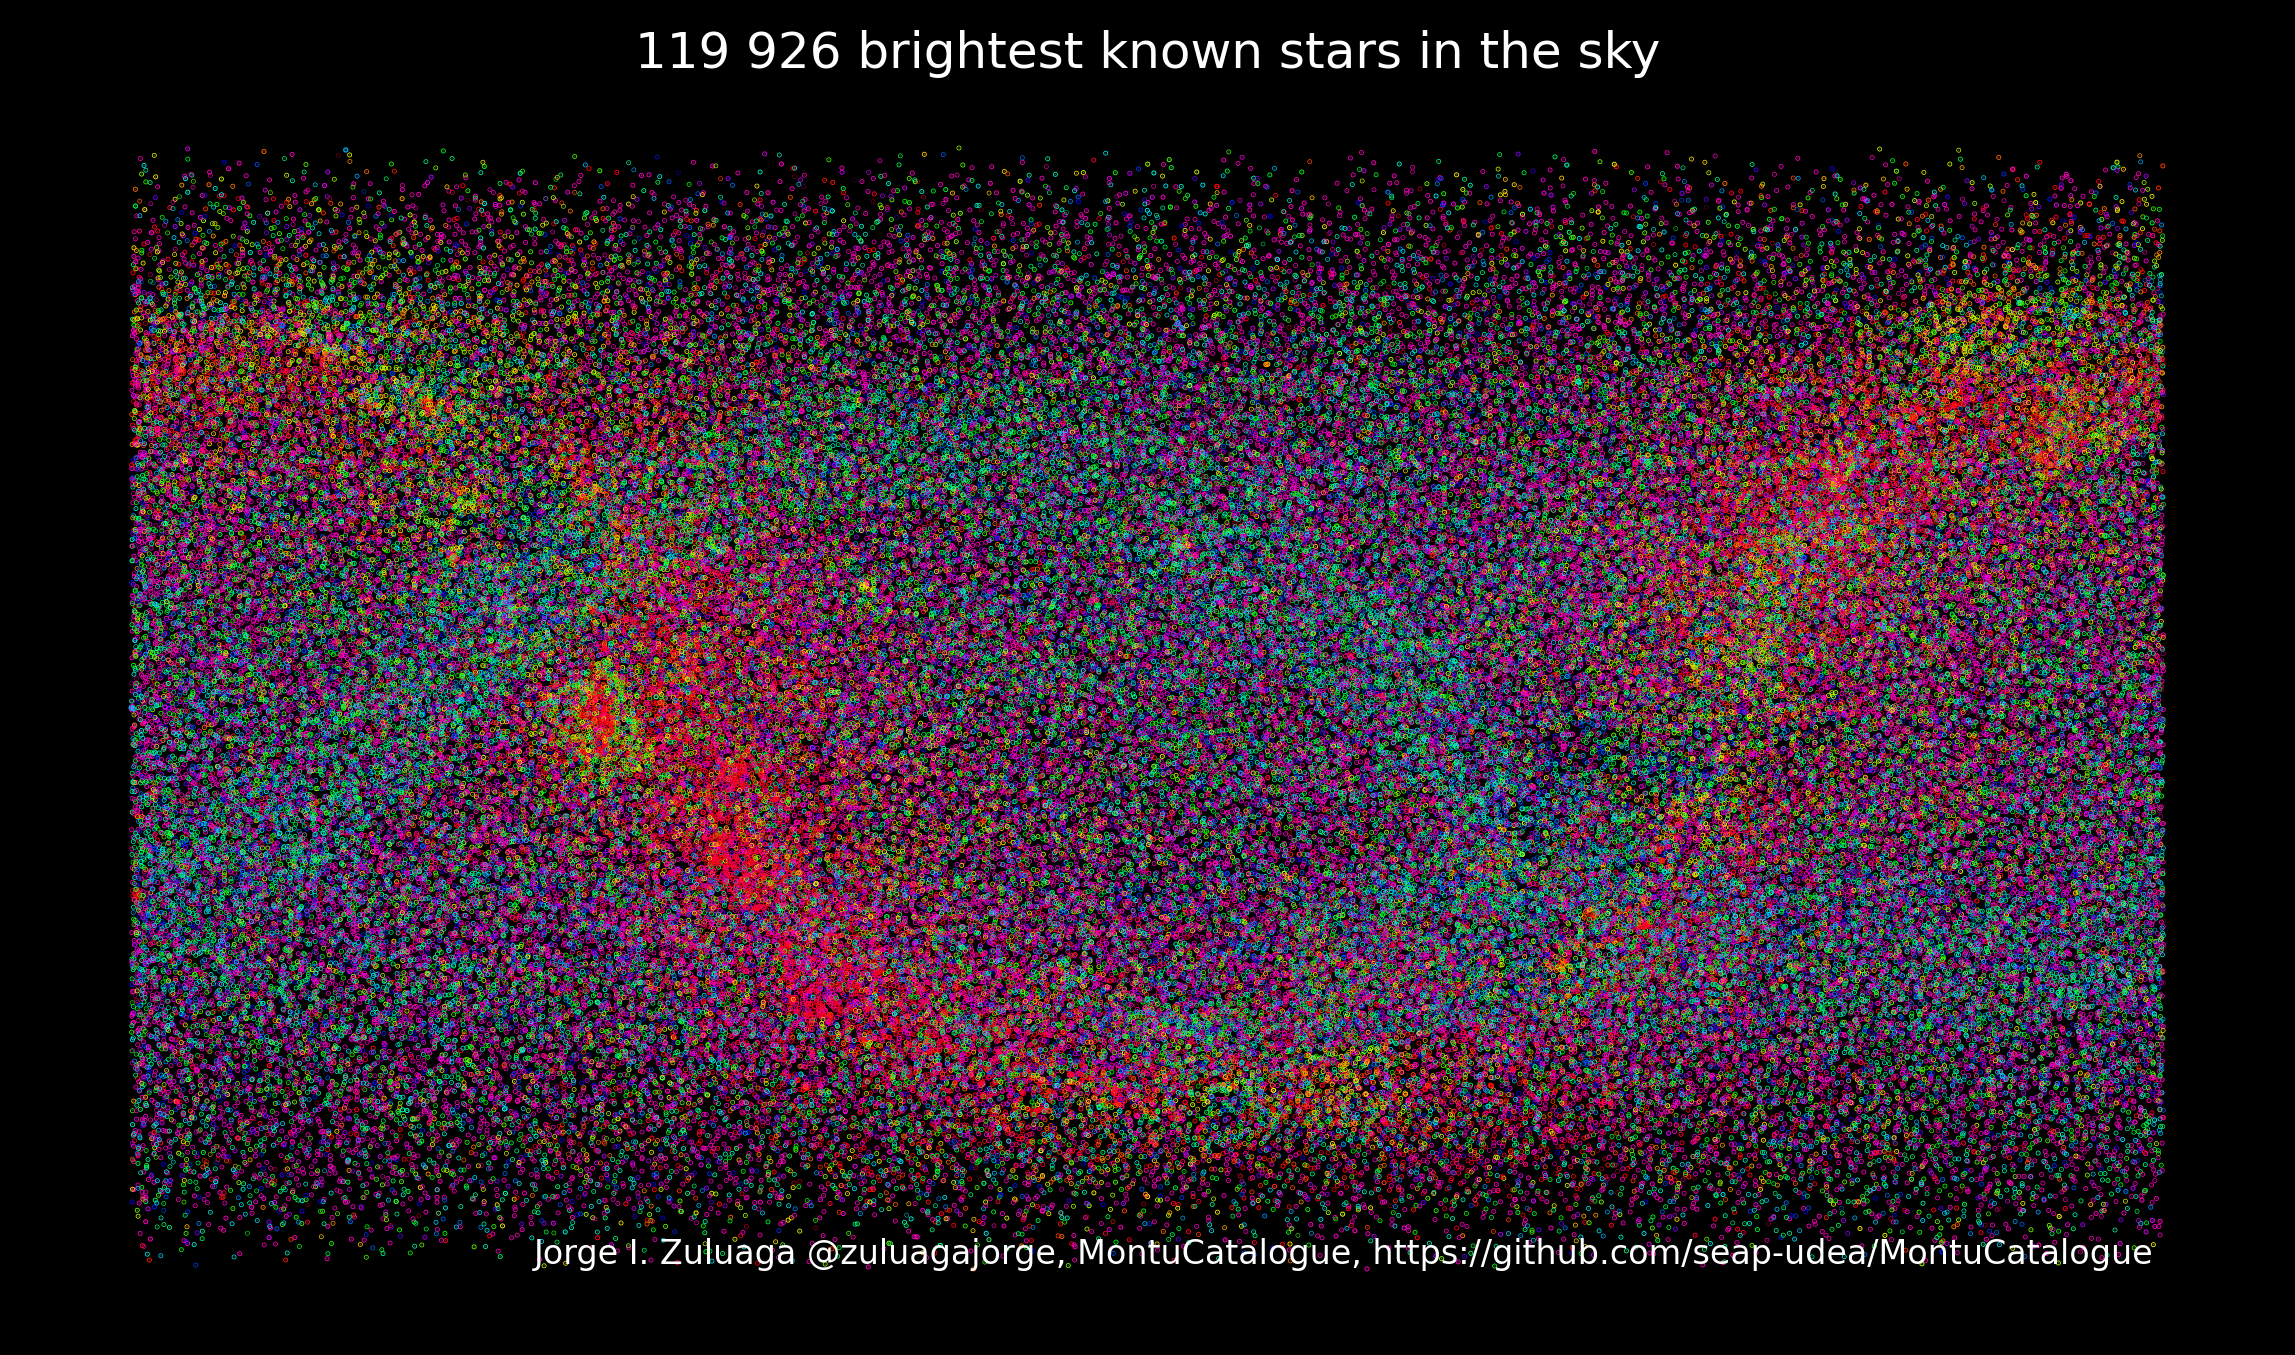

In [185]:
plt.style.use('dark_background')
fig,ax=plt.subplots(figsize=(10,6),dpi=300)
ax.set_position((0, 0, 1, 1))
minsize=0.01
maxsize=0.1
mag2size=montu.Util._linear_map([-2,12],[maxsize,minsize])
ind2color=montu.Util._linear_map([-0.2,2.5],[1,0])
ax.scatter(allstars.data.RAJ2000,allstars.data.DecJ2000,
s=mag2size(allstars.data.Vmag),c=rainbow(allstars.data['B-V']))
ax.axis('off')
ax.set_title('119 926 brightest known stars in the sky')
ax.text(0.95,0.05,'Jorge I. Zuluaga @zuluagajorge, MontuCatalogue, https://github.com/seap-udea/MontuCatalogue',
transform = ax.transAxes,fontsize=8,ha='right')
fig.tight_layout()
fig.savefig('montmp/map-allstars-colors.png',bbox_inches='tight')